# Machine Learning
## AGH 2019/2020
## project 4 - super kNN
### Wiktor Pawłowski Miłosz Mandowski
### Grupa Piątek 14:40 A

### Potrzebne importy

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import imgaug.augmenters as iam

from sklearn.datasets import fetch_openml, load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, normalize
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, LocalOutlierFactor
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn import decomposition
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import linear_model, metrics, datasets, svm, preprocessing
from sklearn.metrics import auc, roc_curve, precision_recall_curve, average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE



### 1. Zbiory danych

#### TNG  (ok 18000 próbek, 20 klas)

Wykorzystaliśmy już przetworzony zbiór.

In [13]:
tng = pd.read_csv("./tng/tng.csv", header=None)
tng

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,0.0,15.728111,9.099586,0.259395,5.156905,0.000000,0.0,0.000000,7.731676,0.000000,...,11.612481,0.000000,3.256385,0.0,0.000000,7.129995,0.000000,3.373063,0.0,9
1,0.0,0.000000,0.000000,0.000000,0.000000,14.229717,0.0,0.000000,0.000000,0.000000,...,0.000000,2.213775,0.000000,0.0,0.000000,0.000000,2.523506,2.307943,0.0,4
2,0.0,0.000000,0.000000,72.029411,0.000000,0.000000,0.0,0.000000,0.000000,56.773968,...,0.000000,0.000000,0.000000,0.0,0.000000,136.649582,0.000000,0.000000,0.0,11
3,0.0,0.000000,0.000000,0.000000,0.000000,14.833830,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.940317,0.000000,0.0,4
4,0.0,0.000000,0.000000,0.000000,4.875045,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,6.780793,0.000000,0.000000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,0.0,0.000000,0.248722,0.000000,0.000000,3.898138,0.0,2.554687,0.000000,4.410306,...,0.000000,0.000000,0.000000,0.0,0.000000,0.785907,0.000000,0.000000,0.0,12
18842,0.0,0.000000,0.000000,0.000000,0.320675,0.000000,0.0,3.230011,0.000000,0.000000,...,0.000000,1.078652,0.000000,0.0,2.671853,0.000000,0.113560,0.000000,0.0,8
18843,0.0,0.000000,0.000000,0.000000,0.000000,0.860070,0.0,1.224586,0.000000,0.457255,...,0.000000,0.000000,0.000000,0.0,0.303810,0.000000,0.000000,0.000000,0.0,4
18844,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,8.226898,0.000000,0.0,5.754258,0.000000,0.000000,0.000000,0.0,6


In [19]:
tng_data = np.array(tng[range(128)])
tng_target = np.array(tng[128])
print(tng_data)
print(tng_data.shape)
print(tng_target)

[[ 0.       15.728111  9.099586 ...  0.        3.373063  0.      ]
 [ 0.        0.        0.       ...  2.523506  2.307943  0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 ...
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        9.186374 ...  0.        0.        0.      ]]
(18846, 128)
[ 9  4 11 ...  4  6  7]


#### MNIST ((70000 próbek 10 klas)

In [20]:
mnist = fetch_openml("mnist_784", data_home="./mnist_784", cache=True)
mnist_data = np.array(mnist.data)
mnist_target = np.array(mnist.target)
print("Dane:")
print(mnist_data)
print("Ilosc probek: ")
print(len(mnist_data))
print("Klasy: ")
print(mnist_target)
print(mnist_data.shape)

Dane:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Ilosc probek: 
70000
Klasy: 
['5' '0' '4' ... '4' '5' '6']
(70000, 784)


#### Dekorelacja z pomocą PSA

Postanowiliśmy wybrać 20 wymiarów dla obu zbiorów danych

In [25]:
DIMENSIONS = 20

pca = PCA()
tng_data = StandardScaler().fit_transform(tng_data)
tng_data = pca.fit_transform(tng_data)

pca = PCA()
mnist_data = StandardScaler().fit_transform(mnist_data)
mnist_data = pca.fit_transform(mnist_data)

print("TNG:")
print(tng_data)
print("MNIST:")
print(mnist_data)

TNG:
[[-0.14408168  0.1177779   0.09440211 ...  0.49973585  0.10230691
  -0.14114216]
 [-0.63005463  0.62590237 -0.65088308 ... -1.06053939  1.37977649
  -0.96953367]
 [-2.4512944  -8.94329544  2.72945666 ... -1.65706181  0.7856794
   1.66018041]
 ...
 [-0.14292426 -0.11065268 -0.28642728 ...  0.26097185 -0.18015063
  -0.2336239 ]
 [-0.56249184 -0.23197683 -0.52124269 ...  2.36052794 -0.72775452
  -0.23310939]
 [-0.81293689  0.35115991  0.0248688  ... -0.77385661 -0.45306999
  -0.31054304]]
MNIST:
[[-0.48405705  2.11337361  1.89314219 ...  0.8055513   0.46191784
  -0.00726839]
 [-0.32318371  0.77448635 -1.14783247 ...  1.23036654 -0.98745227
  -1.10075898]
 [-0.42959677  1.88292861 -2.821046   ...  0.600517    2.47349575
  -0.68613678]
 ...
 [ 0.76864232 -1.27514143 -0.57380068 ... -0.47933286  0.33881781
  -1.54011611]
 [-2.65201222 -3.30436622 -1.19326217 ... -0.71551636 -3.01098176
  -0.27722045]
 [ 2.36188843  0.99484737  0.7718736  ... -0.74037463 -1.45032464
  -2.13384699]]


### Wizualizacja zbiorów danych

#### TNG

(18846, 2)


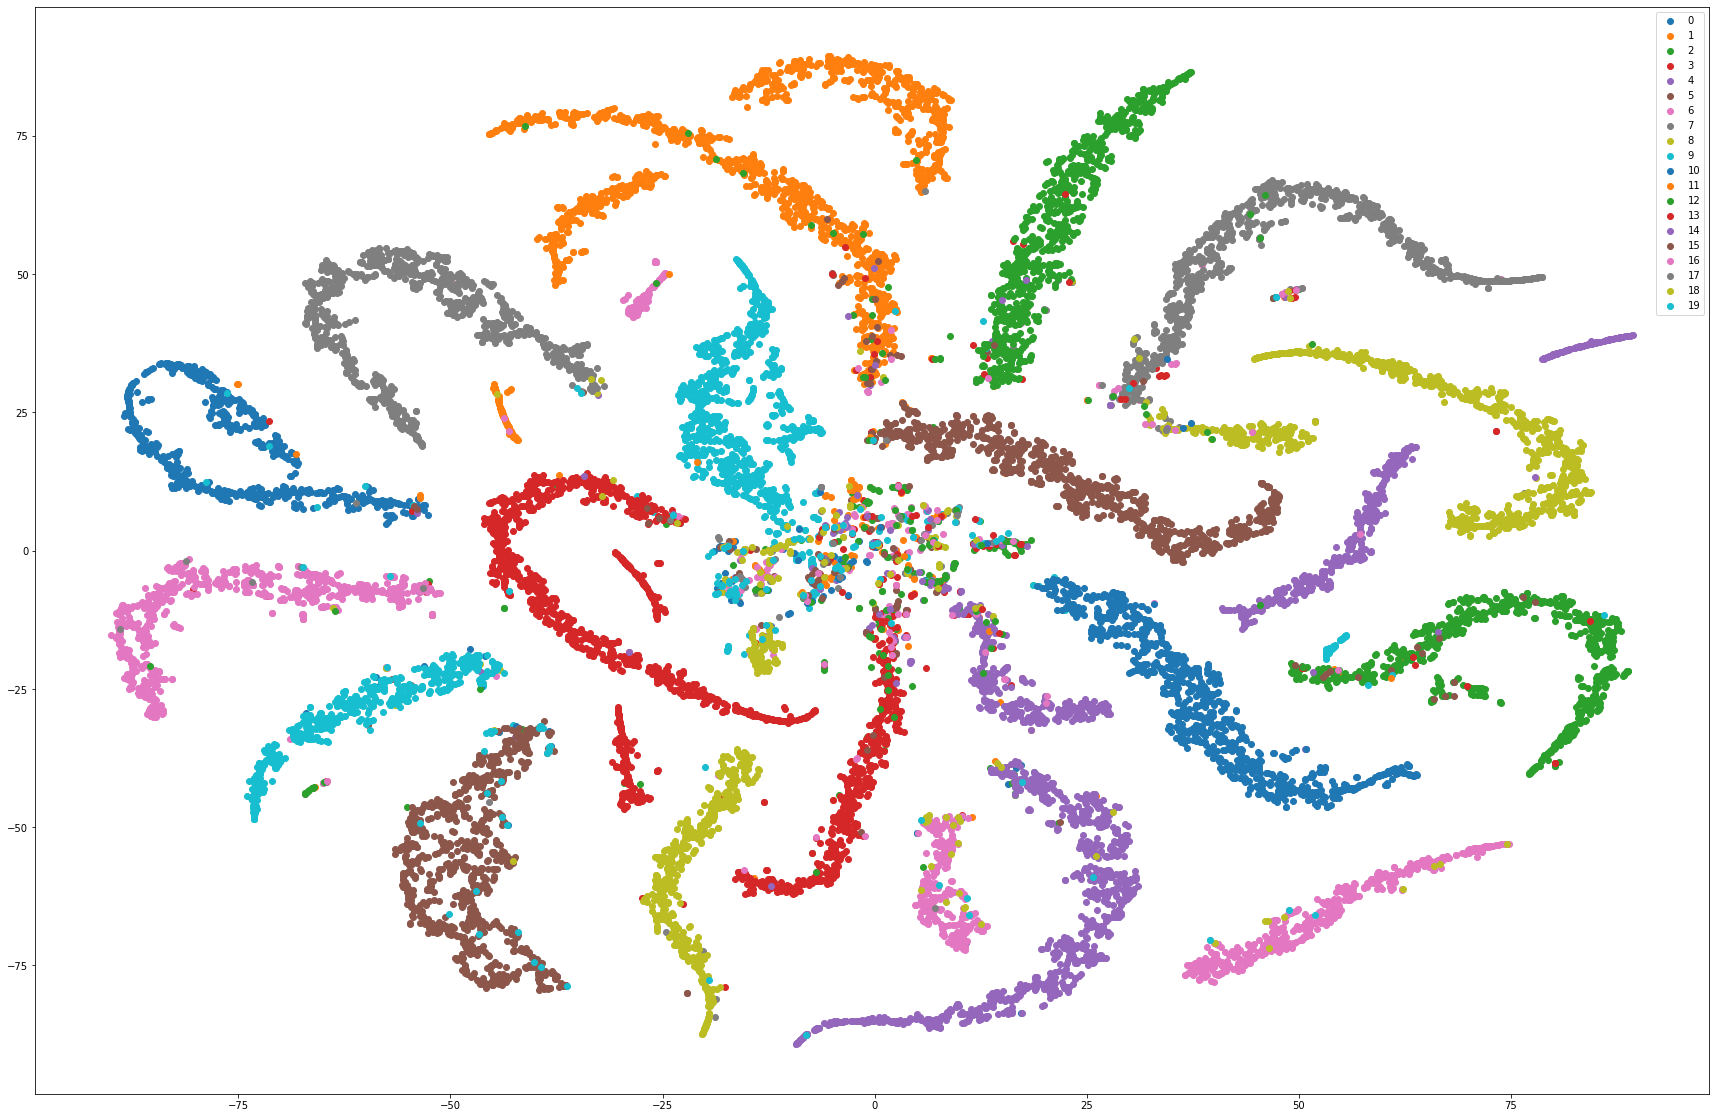

In [26]:
tng_visualize = TSNE(n_components=2).fit_transform(tng_data)
print(tng_visualize.shape)
plt.figure(figsize=(30,20))

for l in range(20):
    plt.scatter(tng_visualize[tng_target == l, 0], tng_visualize[tng_target == l, 1],label = l)
plt.legend()
plt.show()

#### MNIST

(70000, 2)


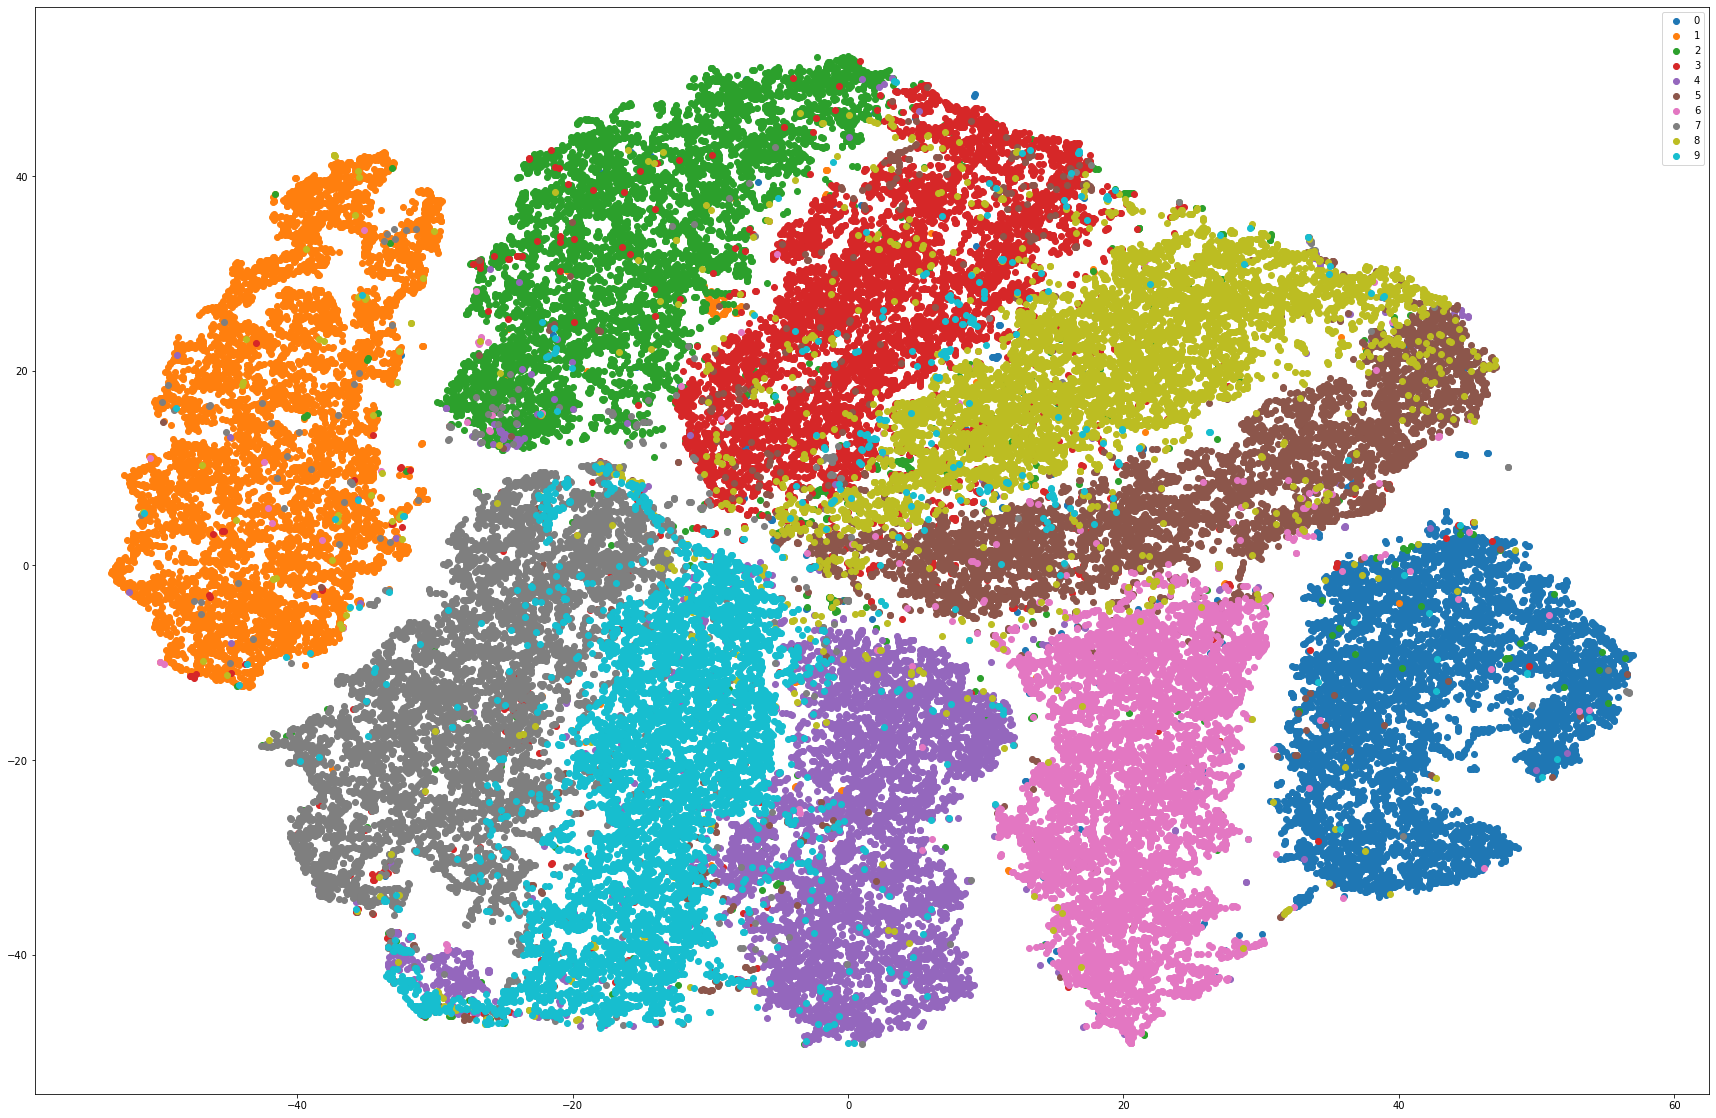

In [27]:
mnist_visualize = TSNE(n_components=2).fit_transform(mnist_data)
print(mnist_visualize.shape)
plt.figure(figsize=(30,20))

for l in range(10):
    plt.scatter(mnist_visualize[mnist_target == str(l), 0], mnist_visualize[mnist_target == str(l), 1],label = l)
plt.legend()
plt.show()

## Stworzenie klasyfikatora zespołowego i porównanie z standardowym SVM

### Podział na test i train data

In [28]:
tng_train_data, tng_test_data, tng_train_labels, tng_test_labels = train_test_split(tng_data, 
                                                                                    tng_target, 
                                                                                    train_size=0.8, 
                                                                                    random_state=0)

mnist_train_data, mnist_test_data, mnist_train_labels, mnist_test_labels = train_test_split(mnist_data, 
                                                                                    mnist_target, 
                                                                                    train_size=0.8, 
                                                                                    random_state=0)

### Klasyfikator SVM

Postanowiliśmy wybrać wielowymiarowy kernel

In [32]:
import time

tng_svm_classifier = svm.SVC(kernel = 'poly')
tng_svm_learn_time = time.time()
tng_svm_classifier.fit(tng_train_data, tng_train_labels)
tng_svm_learn_time = time.time() - tng_svm_learn_time
print("Czas uczenia tng_svm_classifier")
print(str(tng_svm_learn_time) + " s")

mnist_svm_classifier = svm.SVC(kernel = 'poly')
mnist_svm_learn_time = time.time()
mnist_svm_classifier.fit(mnist_train_data, mnist_train_labels)
mnist_svm_learn_time = time.time() - mnist_svm_learn_time
print("Czas uczenia mnist_svm_classifier")
print(str(mnist_svm_learn_time) + " s")

Czas uczenia tng_svm_classifier
8.066198587417603 s
Czas uczenia mnist_svm_classifier
29.57274079322815 s


### Nasz klasyfikator

In [38]:
import random

class SuperKNN:
    def __init__(self, train_data, train_labels, features_number, k):
        self.init_fields()
        self.create_features_sets(features_number)
        self.make_classificators(k)
        self.train_classificators(train_data, train_labels)
        
        
    def init_fields(self):
        self.classificators = []
        self.no_of_clasificators = 7
        self.classificators_features = []
        
        
    def create_features_sets(self,features_number):
        
        # first two are using features 1, 3, 5 ... and 2,4,6...
        
        clas_features =  [i for i in range(0,features_number, 2)]
        self.classificators_features.append(clas_features)
        
        clas_features =  [i for i in range(1,features_number, 2)]
        self.classificators_features.append(clas_features)
        
        # next three gets every third, fourth and fifth feature
        
        clas_features =  [i for i in range(0,features_number, 3)]
        self.classificators_features.append(clas_features)
        
        clas_features =  [i for i in range(0,features_number, 4)]
        self.classificators_features.append(clas_features)
        
        clas_features =  [i for i in range(0,features_number, 5)]
        self.classificators_features.append(clas_features)
        
        # last two gets random 5 (or less) features
        
        no = 5 if features_number >= 5 else features_number
        
        clas_features =  [random.randint(0,features_number-1) for _ in range(no)]
        self.classificators_features.append(clas_features)

        clas_features =  [random.randint(0,features_number-1) for _ in range(no)]
        self.classificators_features.append(clas_features)
        
    def make_clasificators(self, k):
        
        for _ in range(self.no_of_clasificators):
            clas = KNeighborsClassifier(n_neighbors=k)
            self.classificators.append(clas)
        
        
    def train_classificators(self, train_data, train_labels):
        
        for i in range(self.no_of_clasificators):
            data = train_data[:,self.classificators_features[i]]
            self.classificators[i].fit(data, train_labels)
            
            
    def predict(self, test_data):
        
        ret = []
        
        for data in test_data:
            
            result_labels = []
            
            for i in range(self.no_of_clasificators):
                result_labels.append(self.classificators[i].predict(data)) # or [data] ?
            
            
            
            
            
        
test = SuperKNN(None, None, 20, 3)      
        
        